In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sklearn
from sklearn.preprocessing import MinMaxScaler

# Überblick

## Was ist Deep Learning?

<center><img src="img/not_hidden.svg" width="25%"></center>

<center><img src="img/hidden.svg" width="40%"></center>

## Arten des Deep Learning
- Suppervised Learning
- Unsupervised Learning
- Reinforcement Learning

## Die wichtigsten Frameworks
- Tensorflow (Google)
    - Keras
    - Sonnet
- Pytorch (Facebook)
- DeepLearning4J (Eclipse Foundation)
- Theano (Université de Montréal)
- MXNet (Apache)

## Grundbegriffe 
<center>
<img src="img/datenset.png" width="40%">
 </center>
### - <font color='red'>Sample</font> 
### - <font color='blue'>Features</font> 
### - <font color='green'>Label</font> 


# Das Neuron

<center><img src="img/neuron.png" width="60%"></center>

## Activation Function

In [3]:
def plot_activation(x, y, yrange=(0, 1)):
    plt.plot(x, y)
    plt.axvline(0.0, color='k')
    plt.ylim(yrange[0]-0.1, yrange[1]+0.1)
    plt.yticks(np.arange(yrange[0], yrange[1]+0.1, 0.5))
    ax = plt.gca()
    ax.yaxis.grid(True)
    plt.tight_layout()
    plt.show()

### Binary Step

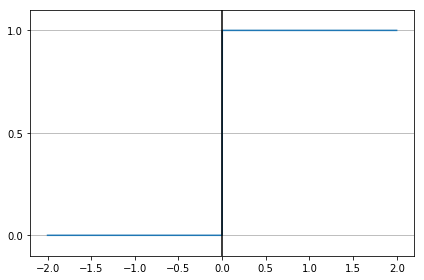

In [4]:
def threshold(x):
    return np.where(x >= 0.0, 1, 0)

x = np.arange(-2, 2, 0.001)
threshold = threshold(x)
plot_activation(x, threshold)

### Sigmoid

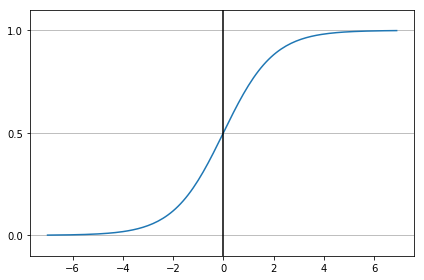

In [5]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

x = np.arange(-7, 7, 0.1)
sig = sigmoid(x)
plot_activation(x, sig)

### Tanh

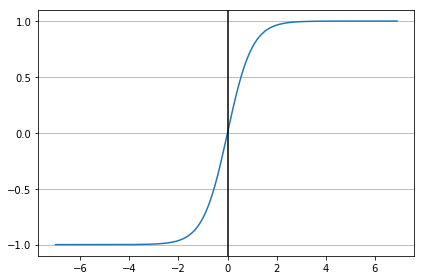

In [6]:
def tanh(x):
    return ((np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)))

x = np.arange(-7, 7, 0.1)
tanh = tanh(x)
plot_activation(x, tanh, yrange=(-1, 1))

### Rectified linear unit

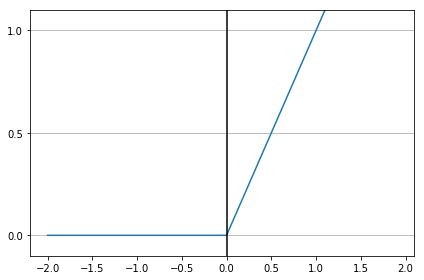

In [7]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-2, 2, 0.1)
relu = relu(x)
plot_activation(x, relu)

## Gradient Descent
<center>
<img src="img/gradient_descent.png" width="60%">
</center>

In [8]:
df = pd.read_csv("iris.data", header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
class AdalineGD(object):
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.activation(X)
            print("-------------------------")
            print("Epoch: ", (i+1))
            print("Prediction on First Sample: ", output[0])
            print("-------------------------")
            errors = (y - output)
            cost = (errors**2).sum() / 2.0
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * cost
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return sigmoid(self.net_input(X))

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

-------------------------
Epoch:  1
Prediction on First Sample:  0.5
-------------------------
-------------------------
Epoch:  2
Prediction on First Sample:  1.668890068677784e-05
-------------------------
-------------------------
Epoch:  3
Prediction on First Sample:  0.0020817270940149566
-------------------------
-------------------------
Epoch:  4
Prediction on First Sample:  0.1343916590836713
-------------------------
-------------------------
Epoch:  5
Prediction on First Sample:  2.1848365427294157e-08
-------------------------
-------------------------
Epoch:  6
Prediction on First Sample:  2.732074843155911e-06
-------------------------
-------------------------
Epoch:  7
Prediction on First Sample:  0.0003260645233556764
-------------------------
-------------------------
Epoch:  8
Prediction on First Sample:  5.362730366799741e-09
-------------------------
-------------------------
Epoch:  9
Prediction on First Sample:  6.701628345234042e-07
-------------------------
---

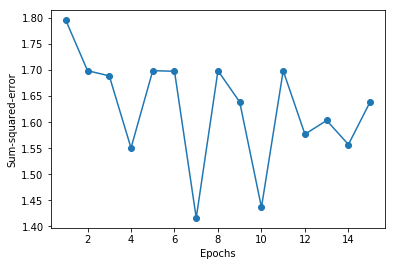

In [72]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
x = df.iloc[0:100, [0, 2]].values

n_iter = 15
eta = 0.01

ada = AdalineGD(n_iter=n_iter, eta=eta).fit(x, y)
plt.plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

## Stochastic und Batch Gradient Descent
<center>
<img src="img/gradient_descent_3d.png" width="60%">
</center>

# Das Neuronale Netz

<center>
<img src="img/nn2.svg" width="60%">
</center>

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.optimizers import Adam
df = pd.read_csv("iris.data", header=None)
dataset = df.values
X = dataset[:, 0:4].astype(float)
y = dataset[:,4]

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [44]:
# Encode
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
encoded_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
# One-Hot-Encode
dummy_y = np_utils.to_categorical(encoded_y)
dummy_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [62]:
# Min-Max Scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [68]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, dummy_y, test_size=0.2, random_state=0)

In [71]:
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, Y_train, epochs=100, batch_size=4, validation_data=[X_test, Y_test])

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 1s 4ms/step - loss: 1.0495 - acc: 0.6000 - val_loss: 1.1037 - val_acc: 0.5667
Epoch 2/100
120/120 [==============================] - 0s 402us/step - loss: 0.9889 - acc: 0.6917 - val_loss: 1.0493 - val_acc: 0.5667
Epoch 3/100
120/120 [==============================] - 0s 429us/step - loss: 0.9226 - acc: 0.6917 - val_loss: 0.9860 - val_acc: 0.5667
Epoch 4/100
120/120 [==============================] - 0s 524us/step - loss: 0.8463 - acc: 0.6917 - val_loss: 0.9023 - val_acc: 0.5667
Epoch 5/100
120/120 [==============================] - 0s 443us/step - loss: 0.7621 - acc: 0.6917 - val_loss: 0.8149 - val_acc: 0.5667
Epoch 6/100
120/120 [==============================] - 0s 458us/step - loss: 0.6723 - acc: 0.6917 - val_loss: 0.7024 - val_acc: 0.5667
Epoch 7/100
120/120 [==============================] - 0s 440us/step - loss: 0.5868 - acc: 0.6917 - val_loss: 0.6229 - val_acc: 0.5667
Epoch 8/100


Epoch 61/100
120/120 [==============================] - 0s 416us/step - loss: 0.0887 - acc: 0.9500 - val_loss: 0.0729 - val_acc: 0.9667
Epoch 62/100
120/120 [==============================] - 0s 446us/step - loss: 0.0924 - acc: 0.9583 - val_loss: 0.0729 - val_acc: 0.9667
Epoch 63/100
120/120 [==============================] - 0s 441us/step - loss: 0.0901 - acc: 0.9500 - val_loss: 0.0727 - val_acc: 0.9667
Epoch 64/100
120/120 [==============================] - 0s 452us/step - loss: 0.0888 - acc: 0.9750 - val_loss: 0.0734 - val_acc: 0.9667
Epoch 65/100
120/120 [==============================] - 0s 464us/step - loss: 0.0892 - acc: 0.9500 - val_loss: 0.0700 - val_acc: 0.9667
Epoch 66/100
120/120 [==============================] - 0s 458us/step - loss: 0.0886 - acc: 0.9583 - val_loss: 0.0697 - val_acc: 0.9667
Epoch 67/100
120/120 [==============================] - 0s 395us/step - loss: 0.0855 - acc: 0.9583 - val_loss: 0.0696 - val_acc: 0.9667
Epoch 68/100
120/120 [==========================

# Wichtige Arten von Neuronalen Netzen
- Densenet
- CNN
- RNN
    - LSTM
    - GRU
- Autoencoder

# Resourcen

## Video Kurse:
- [The Morpheus Tutorials - Pytorch - Youtube (deutsch)](https://www.youtube.com/watch?v=pylvlMuRKY0&list=PLNmsVeXQZj7rx55Mai21reZtd_8m-qe27)
- [The Morpheus Tutorials - Machine Learning - Youtube (deutsch)](https://www.youtube.com/watch?v=GdsOLrqj42I&list=PLNmsVeXQZj7qoIUw0MBYQ9qJffZAVdRWC)
- [Deep Learning for Coders - fast.ai](http://course.fast.ai/)
- [Machine Learning Kurs der Stanford University](https://www.coursera.org/learn/machine-learning)
- [Deep Learning Kursreihe von deeplearning.ai](https://www.coursera.org/specializations/deep-learning)
- [Deep Learning A-Z - Udemy (kostenpflichtig)](https://www.udemy.com/deeplearning/learn/v4/overview)
- [Neural Networks for Machine Learning - Kurs der University of Toronto](https://www.coursera.org/learn/neural-networks)

## Blogs:
- [Machinelearningmastery](https://machinelearningmastery.com/)
- [Fastml](fastml.com)

## Bücher:
- [Fundamentals of Deep Learning](http://www.worldcat.org/title/fundamentals-of-deep-learning-designing-next-generation-machine-intelligence-algorithms/oclc/999617443)
- [Deep Learning](http://www.worldcat.org/title/deep-learning/oclc/1015864549&referer=brief_results)
- [Python Deep Learning](http://www.worldcat.org/title/python-deep-learning/oclc/1021119477?referer=di&ht=edition)
- [Deep Learning with Keras](http://www.worldcat.org/title/deep-learning-with-keras/oclc/986102549&referer=brief_results)
- [Python Machine Learning](http://www.worldcat.org/title/python-machine-learning-unlock-deeper-insights-into-machine-learning-with-this-vital-guide-to-cutting-edge-predictive-analytics/oclc/922532674&referer=brief_results)
- [Deep Learning (Bibel)](http://www.worldcat.org/title/deep-learning/oclc/985397543&referer=brief_results)
- [Sammlung kostenloser Deep Learning Bücher](https://github.com/TechBookHunter/Free-Deep-Learning-Books)

## Platformen:
- [Kaggle - Machine Learning Competitions](https://www.kaggle.com/)
- [UCI - Machine Learning Repositroy](http://archive.ics.uci.edu/ml/index.php)

```bash
git clone https://github.com/Schwub/dv_seminar
```